# Exploratory Data Analysis

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [56]:
data = pd.concat([pd.read_csv('train_processed_data.csv'), pd.read_csv('test_processed_data.csv')], axis = 0)
data.columns

Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight Number', 'Flight IATA Number', 'Flight ICAO Number',
       'Departure Scheduled Day', 'Departure Scheduled Date',
       'Departure Scheduled Hour', 'Departure Scheduled Year',
       'Departure Actual Runway Date', 'Departure Actual Runway Day',
       'Departure Actual Runway Hour', 'Departure Actual Runway Year',
       'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)', 'Delay'],
      dtype='object')

In [58]:
data.head(5)

Flight Type  Status Departure IATA Code Departure ICAO Code  \
0   departure  active                 lhe                opla   
1   departure  active                 lhe                opla   
2   departure  active                 lhe                opla   
3   departure  active                 lhe                opla   
4   departure  active                 lhe                opla   

  Arrival IATA Code Arrival ICAO Code Arrival Scheduled Time  \
0               ruh              oerk    2023-07-20 23:20:00   
1               khi              opkc    2023-07-18 16:50:00   
2               khi              opkc    2023-07-23 11:35:00   
3               kwi              okkk    2023-07-27 01:30:00   
4               dxb              omdb    2023-07-20 14:00:00   

                      Airline Name Airline IATA Code Airline ICAO Code  ...  \
0                           saudia                sv               sva  ...   
1                        flyjinnah                9p               fjl  ...   
2                        flyjinnah                9p               fjl  ...   
3  pakistan international airlines                pk               pia  ...   
4                       serene air                er               sep  ...   

   Departure Actual Runway Day Departure Actual Runway Hour  \
0                     Thursday                           20   
1                      Tuesday                           15   
2                       Sunday                           10   
3                    Wednesday                           23   
4                     Thursday                           11   

  Departure Actual Runway Year Temperature (°F) Dew Point (°F)  Humidity (%)  \
0                         2023             88.2           79.8          76.0   
1                         2023             89.4           80.1          73.8   
2                         2023             86.6           75.8          71.2   
3                         2023             86.9           78.9          77.4   
4                         2023             88.2           79.8          76.0   

   Wind Speed (mph) Pressure (in) Precipitation (in)   Delay  
0               5.3          28.8                0.0 -2100.0  
1              10.2          28.8                0.0   720.0  
2               8.1          28.9                0.0   720.0  
3               8.1          28.9                0.0  1260.0  
4               5.3          28.8                0.0   720.0  

[5 rows x 28 columns]

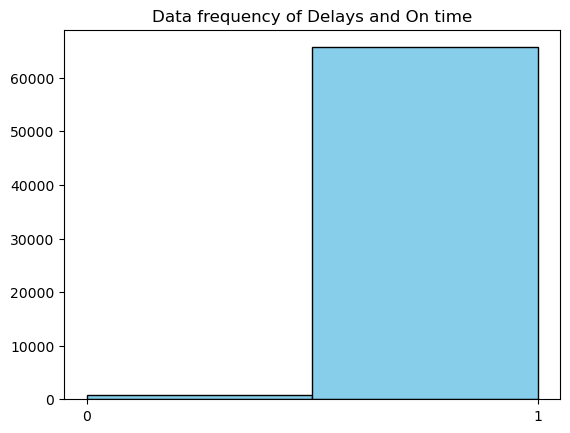

In [60]:
plot_data = data['Delay'].apply(lambda x: 0 if x == 0 else 1)

plt.hist(plot_data, bins=2, color='skyblue', edgecolor='black')
plt.xticks([0, 1], ['0', '1'])
plt.title('Data frequency of Delays and On time')
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("Cat: ", cat_cols)
label_encoders = {}

for col in cat_cols:
    label_enc = LabelEncoder()
    data[col] = label_enc.fit_transform(data[col])  # Fit and transform on train
    label_encoders[col] = label_enc

scaler = StandardScaler()

data[cat_cols] = scaler.fit_transform(data[cat_cols])  # Fit and transform on train
data[num_cols] = scaler.fit_transform(data[num_cols])  # Fit and transform on train

Cat:  Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight IATA Number', 'Flight ICAO Number', 'Departure Scheduled Day',
       'Departure Scheduled Date', 'Departure Actual Runway Date',
       'Departure Actual Runway Day'],
      dtype='object')


In [64]:
data.describe()

Flight Type        Status  Departure IATA Code  Departure ICAO Code  \
count      66482.0  6.648200e+04         6.648200e+04         6.648200e+04   
mean           0.0 -5.258371e-17         1.983646e-16         1.983646e-16   
std            0.0  1.000008e+00         1.000008e+00         1.000008e+00   
min            0.0 -2.568555e-01        -1.250543e+00        -1.250543e+00   
25%            0.0 -2.568555e-01        -1.250543e+00        -1.250543e+00   
50%            0.0 -2.568555e-01         3.972780e-02         3.972780e-02   
75%            0.0 -2.568555e-01         1.329998e+00         1.329998e+00   
max            0.0  4.686340e+00         1.329998e+00         1.329998e+00   

       Arrival IATA Code  Arrival ICAO Code  Arrival Scheduled Time  \
count       6.648200e+04       6.648200e+04            6.648200e+04   
mean        1.506972e-16      -7.096663e-17            1.402232e-16   
std         1.000008e+00       1.000008e+00            1.000008e+00   
min        -1.922720e+00      -2.988864e+00           -1.744855e+00   
25%        -7.168423e-01      -7.223778e-01           -8.602155e-01   
50%         1.744583e-01       7.395508e-02            1.926198e-03   
75%         5.414645e-01       1.115313e+00            8.620293e-01   
max         2.795931e+00       2.524210e+00            1.727985e+00   

       Airline Name  Airline IATA Code  Airline ICAO Code  ...  \
count  6.648200e+04       6.648200e+04       6.648200e+04  ...   
mean  -4.018593e-17      -1.423608e-16      -5.215620e-17  ...   
std    1.000008e+00       1.000008e+00       1.000008e+00  ...   
min   -1.673846e+00      -2.003496e+00      -1.668197e+00  ...   
25%   -9.687876e-01      -8.753875e-01      -8.519634e-01  ...   
50%    1.815702e-01       5.869760e-01       3.723865e-01  ...   
75%    7.381950e-01       7.123214e-01       7.464935e-01  ...   
max    1.888553e+00       1.464394e+00       1.562727e+00  ...   

       Departure Actual Runway Day  Departure Actual Runway Hour  \
count                 6.648200e+04                  6.648200e+04   
mean                  5.942387e-17                 -7.866181e-17   
std                   1.000008e+00                  1.000008e+00   
min                  -1.498280e+00                 -1.613986e+00   
25%                  -9.974545e-01                 -8.703767e-01   
50%                   4.196018e-03                 -1.267677e-01   
75%                   1.005847e+00                  9.142850e-01   
max                   1.506672e+00                  1.806616e+00   

       Departure Actual Runway Year  Temperature (°F)  Dew Point (°F)  \
count                  6.648200e+04      6.648200e+04    6.648200e+04   
mean                   6.181279e-14      1.306470e-15   -4.104094e-17   
std                    1.000008e+00      1.000008e+00    1.000008e+00   
min                   -1.012259e+00     -2.013241e+00   -1.832900e+00   
25%                   -1.012259e+00     -8.340991e-01   -8.162908e-01   
50%                    9.878896e-01      1.529354e-01   -7.693860e-02   
75%                    9.878896e-01      8.153746e-01    9.732776e-01   
max                    9.878896e-01      1.650048e+00    1.687425e+00   

       Humidity (%)  Wind Speed (mph)  Pressure (in)  Precipitation (in)  \
count  6.648200e+04      6.648200e+04   6.648200e+04             66482.0   
mean   1.385132e-16      2.838665e-16   9.184621e-15                 0.0   
std    1.000008e+00      1.000008e+00   1.000008e+00                 0.0   
min   -2.492928e+00     -1.441894e+00  -8.785994e+00                 0.0   
25%   -5.624328e-01     -8.390489e-01  -4.858108e-01                 0.0   
50%    1.961962e-01     -5.272848e-02   6.753476e-02                 0.0   
75%    6.464394e-01      6.811705e-01   6.208803e-01                 0.0   
max    1.929324e+00      3.328449e+00   1.174226e+00                 0.0   

              Delay  
count  6.648200e+04  
mean  -3.740711e-18  
std    1.000008e+00  
min   -4.095325e+01  
25%

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split

alphas = np.arange(0.01, 10, 0.001) 
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.20, random_state=42)
param_grid = {'alpha': alphas}

kf=KFold(n_splits=4, shuffle=True, random_state=42)
lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso, param_grid, verbose=2, cv=kf)
grid_search.fit(X_train, Y_train)

# calculate best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

Fitting 4 folds for each of 9990 candidates, totalling 39960 fits
[CV] END .........................................alpha=0.01; total time=   0.7s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END ........................................alpha=0.011; total time=   0.0s
[CV] END ........................................alpha=0.011; total time=   0.0s
[CV] END ........................................alpha=0.011; total time=   0.0s
[CV] END ........................................alpha=0.011; total time=   0.0s
[CV] END .........................alpha=0.011999999999999999; total time=   0.0s
[CV] END .........................alpha=0.011999999999999999; total time=   0.0s
[CV] END .........................alpha=0.011999999999999999; total time=   0.0s
[CV] END .........................alpha=0.0

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.590e+04, tolerance: 5.320e+00
  model = cd_fast.enet_coordinate_descent(


Column Names: ['Flight Type' 'Status' 'Departure IATA Code' 'Departure ICAO Code'
 'Arrival IATA Code' 'Arrival ICAO Code' 'Arrival Scheduled Time'
 'Airline Name' 'Airline IATA Code' 'Airline ICAO Code' 'Flight Number'
 'Flight IATA Number' 'Flight ICAO Number' 'Departure Scheduled Day'
 'Departure Scheduled Date' 'Departure Scheduled Hour'
 'Departure Scheduled Year' 'Departure Actual Runway Date'
 'Departure Actual Runway Day' 'Departure Actual Runway Hour'
 'Departure Actual Runway Year' 'Temperature (°F)' 'Dew Point (°F)'
 'Humidity (%)' 'Wind Speed (mph)' 'Pressure (in)' 'Precipitation (in)']


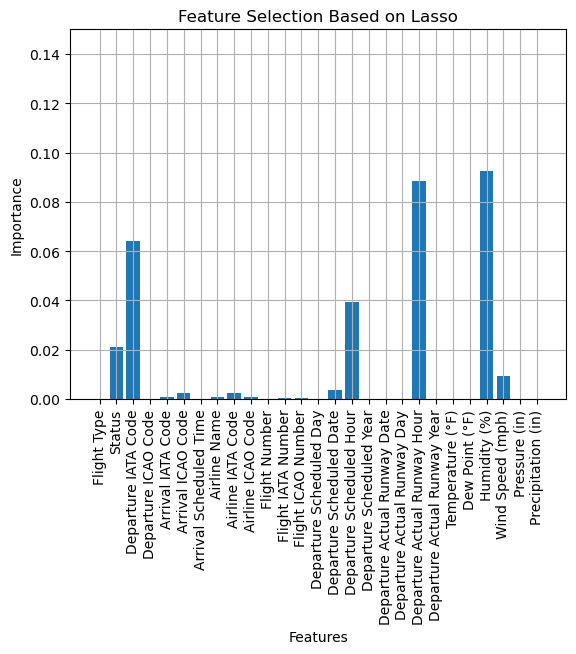

In [ ]:
# calling the model with the best parameter
#best_alpha = 0.01
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.20, random_state=42)
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, Y_train)

# Using np.abs() to make coefficients positive.  
lasso_best_coef = np.abs(lasso_best.coef_)

cols = data.drop("Delay", axis=1).columns
print("Column Names: {}".format(cols.values))

# plotting the Column Names and Importance of Columns. 
plt.bar(cols, lasso_best_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
imp_feat_df = pd.DataFrame({
    'feat': data.drop('Delay', axis = 1).columns,
    'coef': lasso_best_coef
})

# filter feats with zero coefficient
imp_feat = imp_feat_df[imp_feat_df['coef'] != 0]
print("Important Features are: \n", imp_feat, [imp_feat_df['coef'] != 0])


Y_pred = lasso_best.predict(X_test)


MAE = mean_absolute_error(Y_test, Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"Mean Absolute Error: {MAE}")
print(f"Root Mean Squared Error: {RMSE}")

#              Status  0.005809
# 2            Departure IATA Code  0.040828
# 4              Arrival IATA Code  0.040286
# 5              Arrival ICAO Code  0.036452
# 7                   Airline Name  0.058597
# 8              Airline IATA Code  0.044953
# 9              Airline ICAO Code  0.035749
# 10                 Flight Number  0.068403
# 15      Departure Scheduled Hour  0.079411
# 16      Departure Scheduled Year  0.028225
# 19  Departure Actual Runway Hour  0.017916
# 23                  Humidity (%)  0.032273

Important Features are: 
                             feat      coef
4              Arrival IATA Code  0.000020
6         Arrival Scheduled Time  0.000025
7                   Airline Name  0.000013
8              Airline IATA Code  0.000047
11            Flight IATA Number  0.000006
12            Flight ICAO Number  0.000006
14      Departure Scheduled Date  0.001292
16      Departure Scheduled Year  3.985925
17  Departure Actual Runway Date  0.030817
18   Departure Actual Runway Day  0.000447
20  Departure Actual Runway Year  1.923483
23                  Humidity (%)  0.032173
25                 Pressure (in)  0.002137 [0     False
1     False
2     False
3     False
4      True
5     False
6      True
7      True
8      True
9     False
10    False
11     True
12     True
13    False
14     True
15    False
16     True
17     True
18     True
19    False
20     True
21    False
22    False
23     True
24    False
25     True
26    False
27    False
Name: coef, dtype: bool]
Mean Absol

In [104]:
data = pd.concat([pd.read_csv('train_processed_data.csv'), pd.read_csv('test_processed_data.csv')], axis = 0)
data.columns
data['Delay'] = data['Delay'].apply(lambda x: 0 if x < 0 else x)

### Delay Distributions

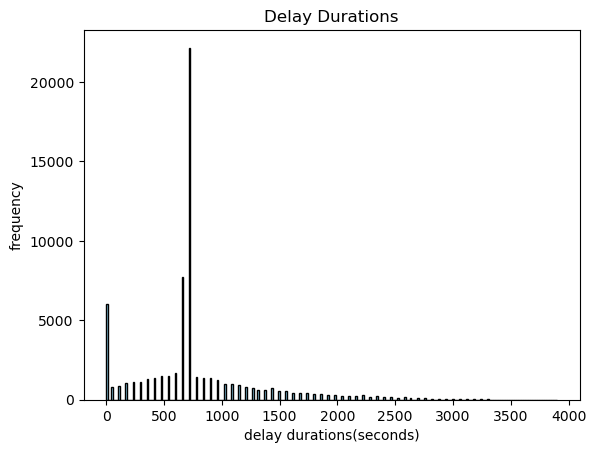

In [105]:
plt.hist(data['Delay'], bins= int(np.sqrt(len(data))), color='skyblue', edgecolor='black')
plt.title('Delay Durations')
plt.ylabel('frequency')
plt.xlabel('delay durations(seconds)')
plt.show()

In [106]:
# Ensure 'Departure Scheduled Time' is converted to datetime if it's in timestamp format
# data['Departure Scheduled Time'] = pd.to_datetime(data['Departure Scheduled Time'], unit='s')

# # # Extract day name, date, and hour from 'Departure Scheduled Time'
# # data['Departure Scheduled Day'] = data['Departure Scheduled Time'].dt.day_name()
# data['Departure Scheduled Date'] = data['Departure Scheduled Time'].dt.date
#data['Departure Scheduled Hour'] = data['Departure Scheduled Time'].dt.hour

# Drop the original 'Departure Scheduled Time' column
#data.drop(columns=['Departure Scheduled Time'], inplace=True)

### Temporal Analysis

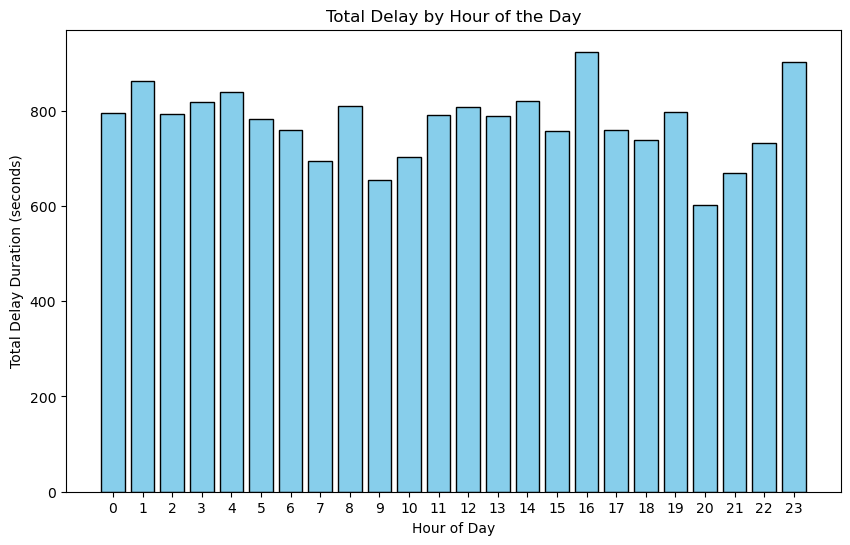

In [107]:
plt.figure(figsize=(10, 6))

delay_by_hour = data.groupby('Departure Scheduled Hour')['Delay'].mean().reset_index()

plt.bar(delay_by_hour['Departure Scheduled Hour'], delay_by_hour['Delay'], color='skyblue',  edgecolor='black')

plt.title('Total Delay by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Delay Duration (seconds)')
plt.xticks(range(24))  # Ensure x-axis labels cover all 24 hours

plt.show()

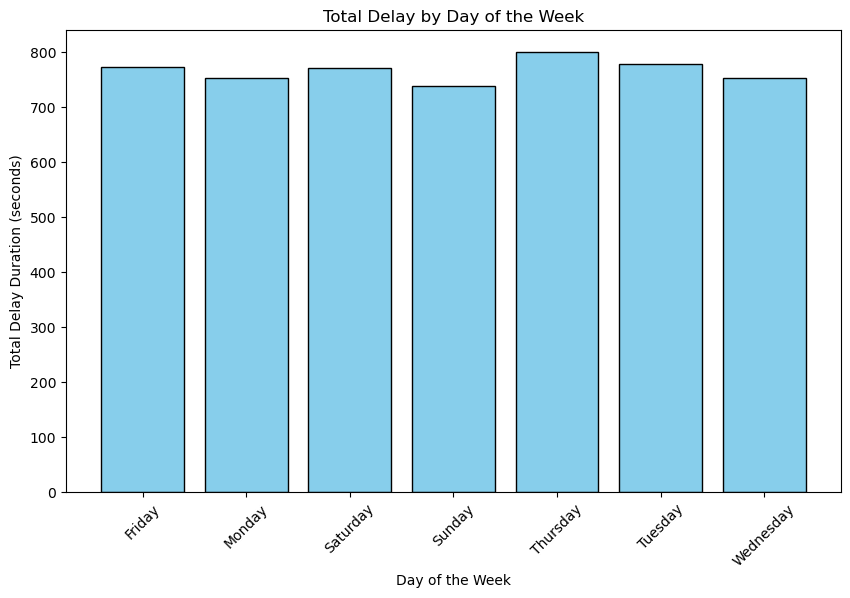

In [108]:
delay_by_day = data.groupby('Departure Scheduled Day')['Delay'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(delay_by_day['Departure Scheduled Day'], delay_by_day['Delay'], color='skyblue', edgecolor='black')

plt.title('Total Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Delay Duration (seconds)')
plt.xticks(rotation=45) 
plt.show()

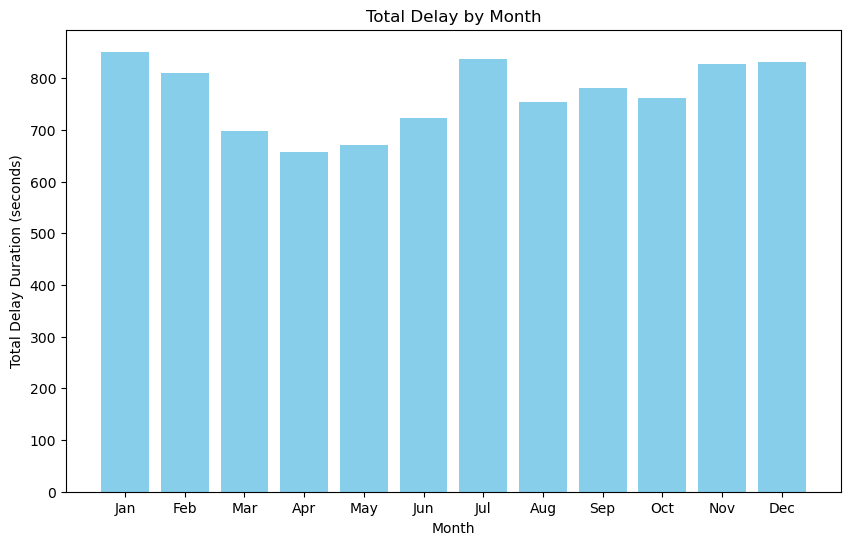

In [109]:
data['Month'] = pd.to_datetime(data['Departure Scheduled Date']).dt.month

delay_by_month = data.groupby('Month')['Delay'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(delay_by_month['Month'], delay_by_month['Delay'], color='skyblue')
plt.title('Total Delay by Month')
plt.xlabel('Month')
plt.ylabel('Total Delay Duration (seconds)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

### Category-Wise Analysis

In [110]:
data.columns

Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight Number', 'Flight IATA Number', 'Flight ICAO Number',
       'Departure Scheduled Day', 'Departure Scheduled Date',
       'Departure Scheduled Hour', 'Departure Scheduled Year',
       'Departure Actual Runway Date', 'Departure Actual Runway Day',
       'Departure Actual Runway Hour', 'Departure Actual Runway Year',
       'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)', 'Delay',
       'Month'],
      dtype='object')

In [111]:
len(data['Airline Name'].unique())

97

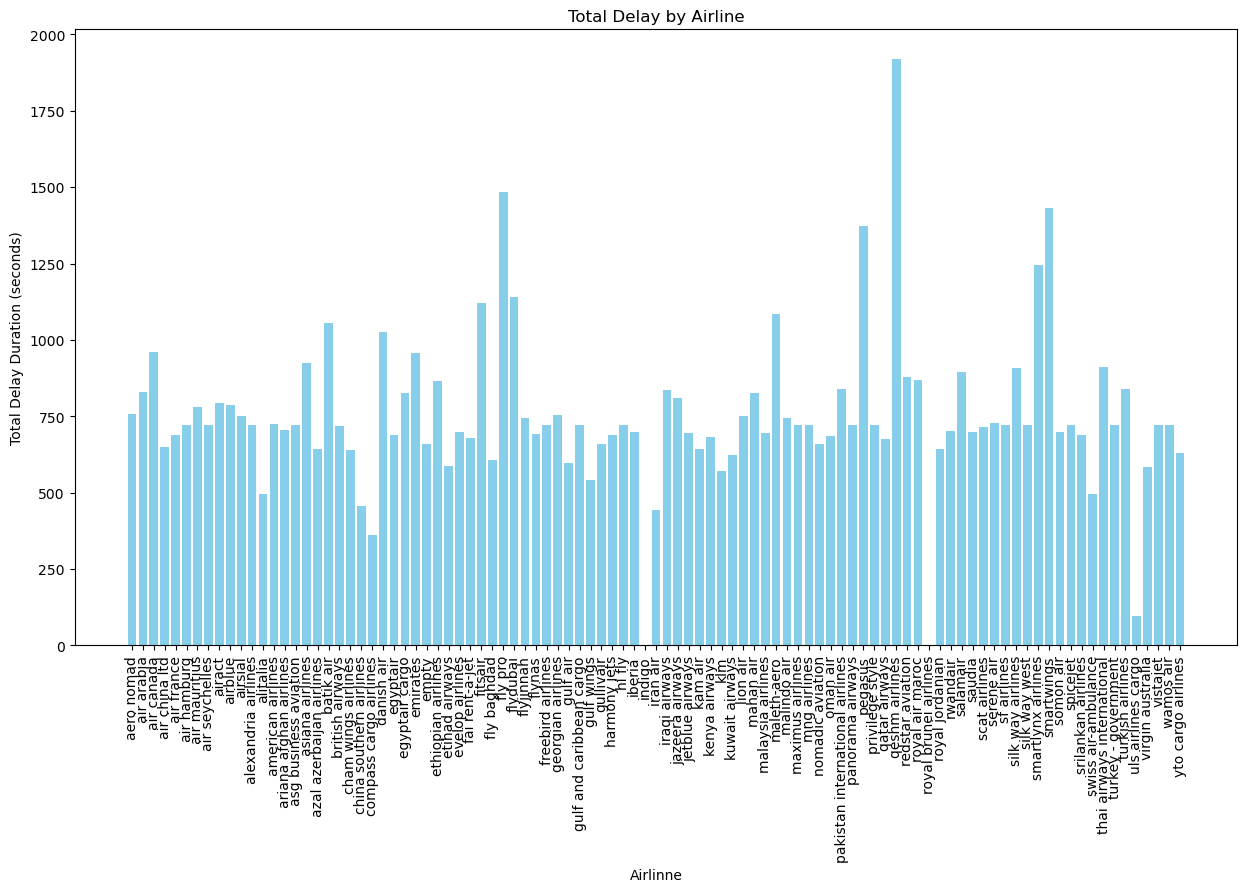

In [112]:
delay_by_airline = data.groupby('Airline Name')['Delay'].mean().reset_index()

plt.figure(figsize=(15, 8))
plt.bar(delay_by_airline['Airline Name'], delay_by_airline['Delay'], color='skyblue')
plt.title('Total Delay by Airline')
plt.xlabel('Airlinne')
plt.ylabel('Total Delay Duration (seconds)')
airline_labels = ['aero nomad', 'air arabia', 'air canada', 'air china ltd',
       'air france', 'air hamburg', 'air mauritius', 'air seychelles',
       'airact', 'airblue', 'airsial', 'alexandria airlines', 'alitalia',
       'american airlines', 'ariana afghan airlines',
       'asg business aviation', 'asiana airlines',
       'azal azerbaijan airlines', 'batik air', 'british airways',
       'cham wings airlines', 'china southern airlines',
       'compass cargo airlines', 'danish air', 'egyptair',
       'egyptair cargo', 'emirates', 'empty', 'ethiopian airlines',
       'etihad airways', 'evelop airlines', 'fai rent-a-jet', 'fitsair',
       'fly baghdad', 'fly pro', 'flydubai', 'flyjinnah', 'flynas',
       'freebird airlines', 'georgian airlines', 'gulf air',
       'gulf and caribbean cargo', 'gulf wings', 'gullivair',
       'harmony jets', 'hi fly', 'iberia', 'indigo', 'iran air',
       'iraqi airways', 'jazeera airways', 'jetblue airways', 'kam air',
       'kenya airways', 'klm', 'kuwait airways', 'lion air', 'mahan air',
       'malaysia airlines', 'maleth-aero', 'malindo air',
       'maximus airlines', 'mng airlines', 'nomadic aviation', 'oman air',
       'pakistan international airlines', 'panorama airways', 'pegasus',
       'privilege style', 'qatar airways', 'qeshm airlines',
       'redstar aviation', 'royal air maroc', 'royal brunei airlines',
       'royal jordanian', 'rwandair', 'salamair', 'saudia',
       'scat airlines', 'serene air', 'sf airlines', 'silk way airlines',
       'silk way west', 'smartlynx airlines', 'smartwings', 'somon air',
       'spicejet', 'srilankan airlines', 'swiss air-ambulance',
       'thai airways international', 'turkey - government',
       'turkish airlines', 'uls airlines cargo', 'virgin australia',
       'vistajet', 'wamos air', 'yto cargo airlines']

plt.xticks(ticks=range(len(airline_labels)), labels=airline_labels)
plt.xticks(rotation=90) 
plt.show()

## Correlation 

In [19]:
data = pd.concat([pd.read_csv('train_processed_data.csv'), pd.read_csv('test_processed_data.csv')], axis = 0)
data.columns
data['Delay'] = data['Delay'].apply(lambda x: 0 if x < 0 else x)
selected_columns = ['Status',
    'Departure IATA Code',
    'Arrival IATA Code',
    'Arrival ICAO Code',
    'Airline Name',
    'Airline IATA Code',
    'Airline ICAO Code',
    'Flight Number',
    'Departure Scheduled Hour',
    'Departure Scheduled Year',
    'Departure Actual Runway Hour',
    'Humidity (%)',
    'Delay'
]
data2 = data[selected_columns]

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns


label_encoders = {}

for col in cat_cols:
    label_enc = LabelEncoder()
    data[col] = label_enc.fit_transform(data[col])
    label_encoders[col] = label_enc

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [17]:
cat_cols2 = data2.select_dtypes(include=['object']).columns
num_cols2 = data2.select_dtypes(include=['int64', 'float64']).columns

label_encoders = {}


for col in cat_cols2:
    label_enc = LabelEncoder()
    data2.loc[:, col] = label_enc.fit_transform(data2[col]) 
    label_encoders[col] = label_enc

scaler = StandardScaler()
data2.loc[:,num_cols2] = scaler.fit_transform(data2[num_cols2].astype(float))



C:\Users\mahee\AppData\Local\Temp\ipykernel_12508\2458371451.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.56132716 -0.52425022 -0.52494979 ... -0.74881055  2.0487494
 -0.5844128 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[:,num_cols2] = scaler.fit_transform(data2[num_cols2].astype(float))
C:\Users\mahee\AppData\Local\Temp\ipykernel_12508\2458371451.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.30642476  0.570345   -0.3129507  ... -0.16573475 -0.3129507
 -0.3129507 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[:,num_cols2] = scaler.fit_transform(data2[num_cols2].astype(float))
C:\Users\mahee\AppData\Local\Temp\ipykernel_12508\2458371451.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated a

In [23]:
print('Categorical Columns', cat_cols)
print('Numerical Columns', num_cols)

Categorical Columns Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight IATA Number', 'Flight ICAO Number', 'Departure Scheduled Day',
       'Departure Scheduled Date', 'Departure Actual Runway Date',
       'Departure Actual Runway Day'],
      dtype='object')
Numerical Columns Index(['Flight Number', 'Departure Scheduled Hour', 'Departure Scheduled Year',
       'Departure Actual Runway Hour', 'Departure Actual Runway Year',
       'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)', 'Delay'],
      dtype='object')


In [25]:
data.columns

Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight Number', 'Flight IATA Number', 'Flight ICAO Number',
       'Departure Scheduled Day', 'Departure Scheduled Date',
       'Departure Scheduled Hour', 'Departure Scheduled Year',
       'Departure Actual Runway Date', 'Departure Actual Runway Day',
       'Departure Actual Runway Hour', 'Departure Actual Runway Year',
       'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)', 'Delay'],
      dtype='object')

In [27]:
# Loop through each column in the dataframe and print the unique values
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("\n")


Unique values in Flight Type:
[0]


Unique values in Status:
[0 1 2]


Unique values in Departure IATA Code:
[2 1 0]


Unique values in Departure ICAO Code:
[2 1 0]


Unique values in Arrival IATA Code:
[69 47 50 25 43 23 48  8  6 42 76 62 34 68 11 22 57  7 49 89 72 56 17 85
 86 39 58 19  3 31 45 28 74 40 26 41 63 54 14 24 59 32 51 75 66 71 65 21
 10 83 33  2 70 30 29 38 79  4 78 90 88 13  0 37 44 61 52 16 81 55  1 80
 82 67 73 87 77 35 64 84 15 36 46 27 18 12 60  5 53 20  9]


Unique values in Arrival ICAO Code:
[32 51 36 39 30 67 86 62 37 23 44 64 69 41 80 28 31 26 81  0 42 43 76 55
 90 33 34 88 68 70 57 29 59 50 73 20 85 47 83 40 53 49 52 58 54 22 82 65
 45 61 48  8 56 71 19 79 75 35 60 18 17 10  9 77 24 25  4 46 87 13 38 72
 11 16 74 12  5  3  1 21  2 27 89 63 84  6 14  7 66 78 15]


Unique values in Arrival Scheduled Time:
[  847   589  1109 ... 35976 35774 35947]


Unique values in Airline Name:
[77 36 65 79  9 46 96 33 75 29 13 93 69 64  2 91 10 74  1 89 19 51 55 37
 54 40 50 26

In [31]:
data.columns

Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight Number', 'Flight IATA Number', 'Flight ICAO Number',
       'Departure Scheduled Day', 'Departure Scheduled Date',
       'Departure Scheduled Hour', 'Departure Scheduled Year',
       'Departure Actual Runway Date', 'Departure Actual Runway Day',
       'Departure Actual Runway Hour', 'Departure Actual Runway Year',
       'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)', 'Delay'],
      dtype='object')

In [33]:
# w_delay = data[['Temperature (°F)', 'Wind Speed (mph)', 'Humidity (%)', 
#                           'Precipitation (in)', 'Delay']]

In [35]:
data.columns

Index(['Flight Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code',
       'Arrival IATA Code', 'Arrival ICAO Code', 'Arrival Scheduled Time',
       'Airline Name', 'Airline IATA Code', 'Airline ICAO Code',
       'Flight Number', 'Flight IATA Number', 'Flight ICAO Number',
       'Departure Scheduled Day', 'Departure Scheduled Date',
       'Departure Scheduled Hour', 'Departure Scheduled Year',
       'Departure Actual Runway Date', 'Departure Actual Runway Day',
       'Departure Actual Runway Hour', 'Departure Actual Runway Year',
       'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)',
       'Wind Speed (mph)', 'Pressure (in)', 'Precipitation (in)', 'Delay'],
      dtype='object')

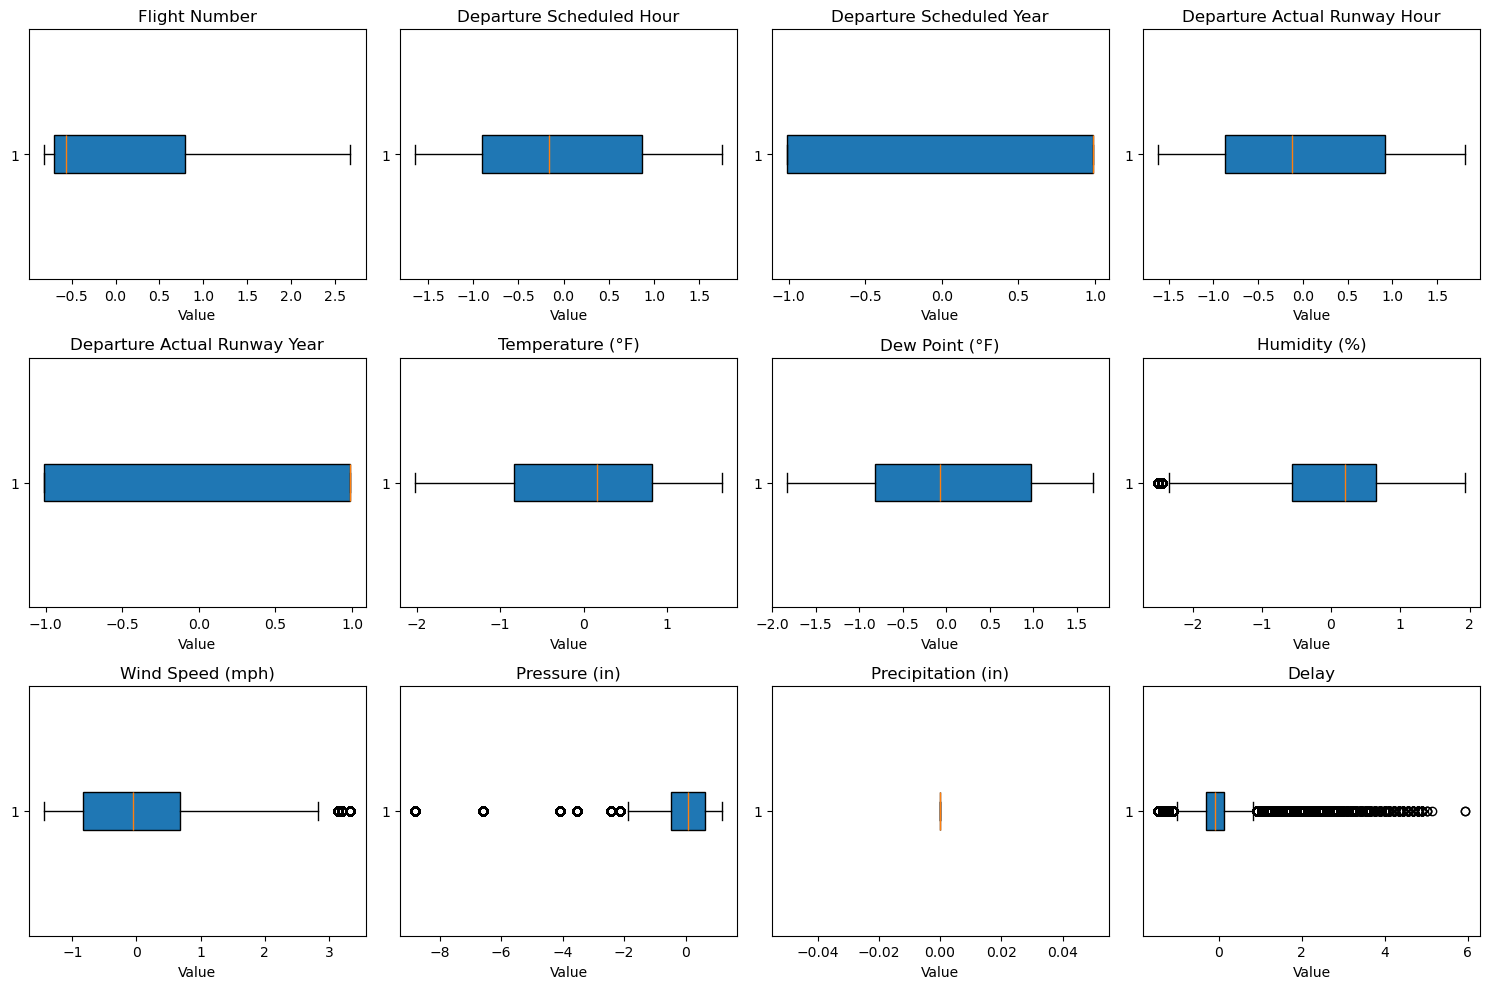

In [37]:
plt.figure(figsize=(15, 10))  
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 4, i) 
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


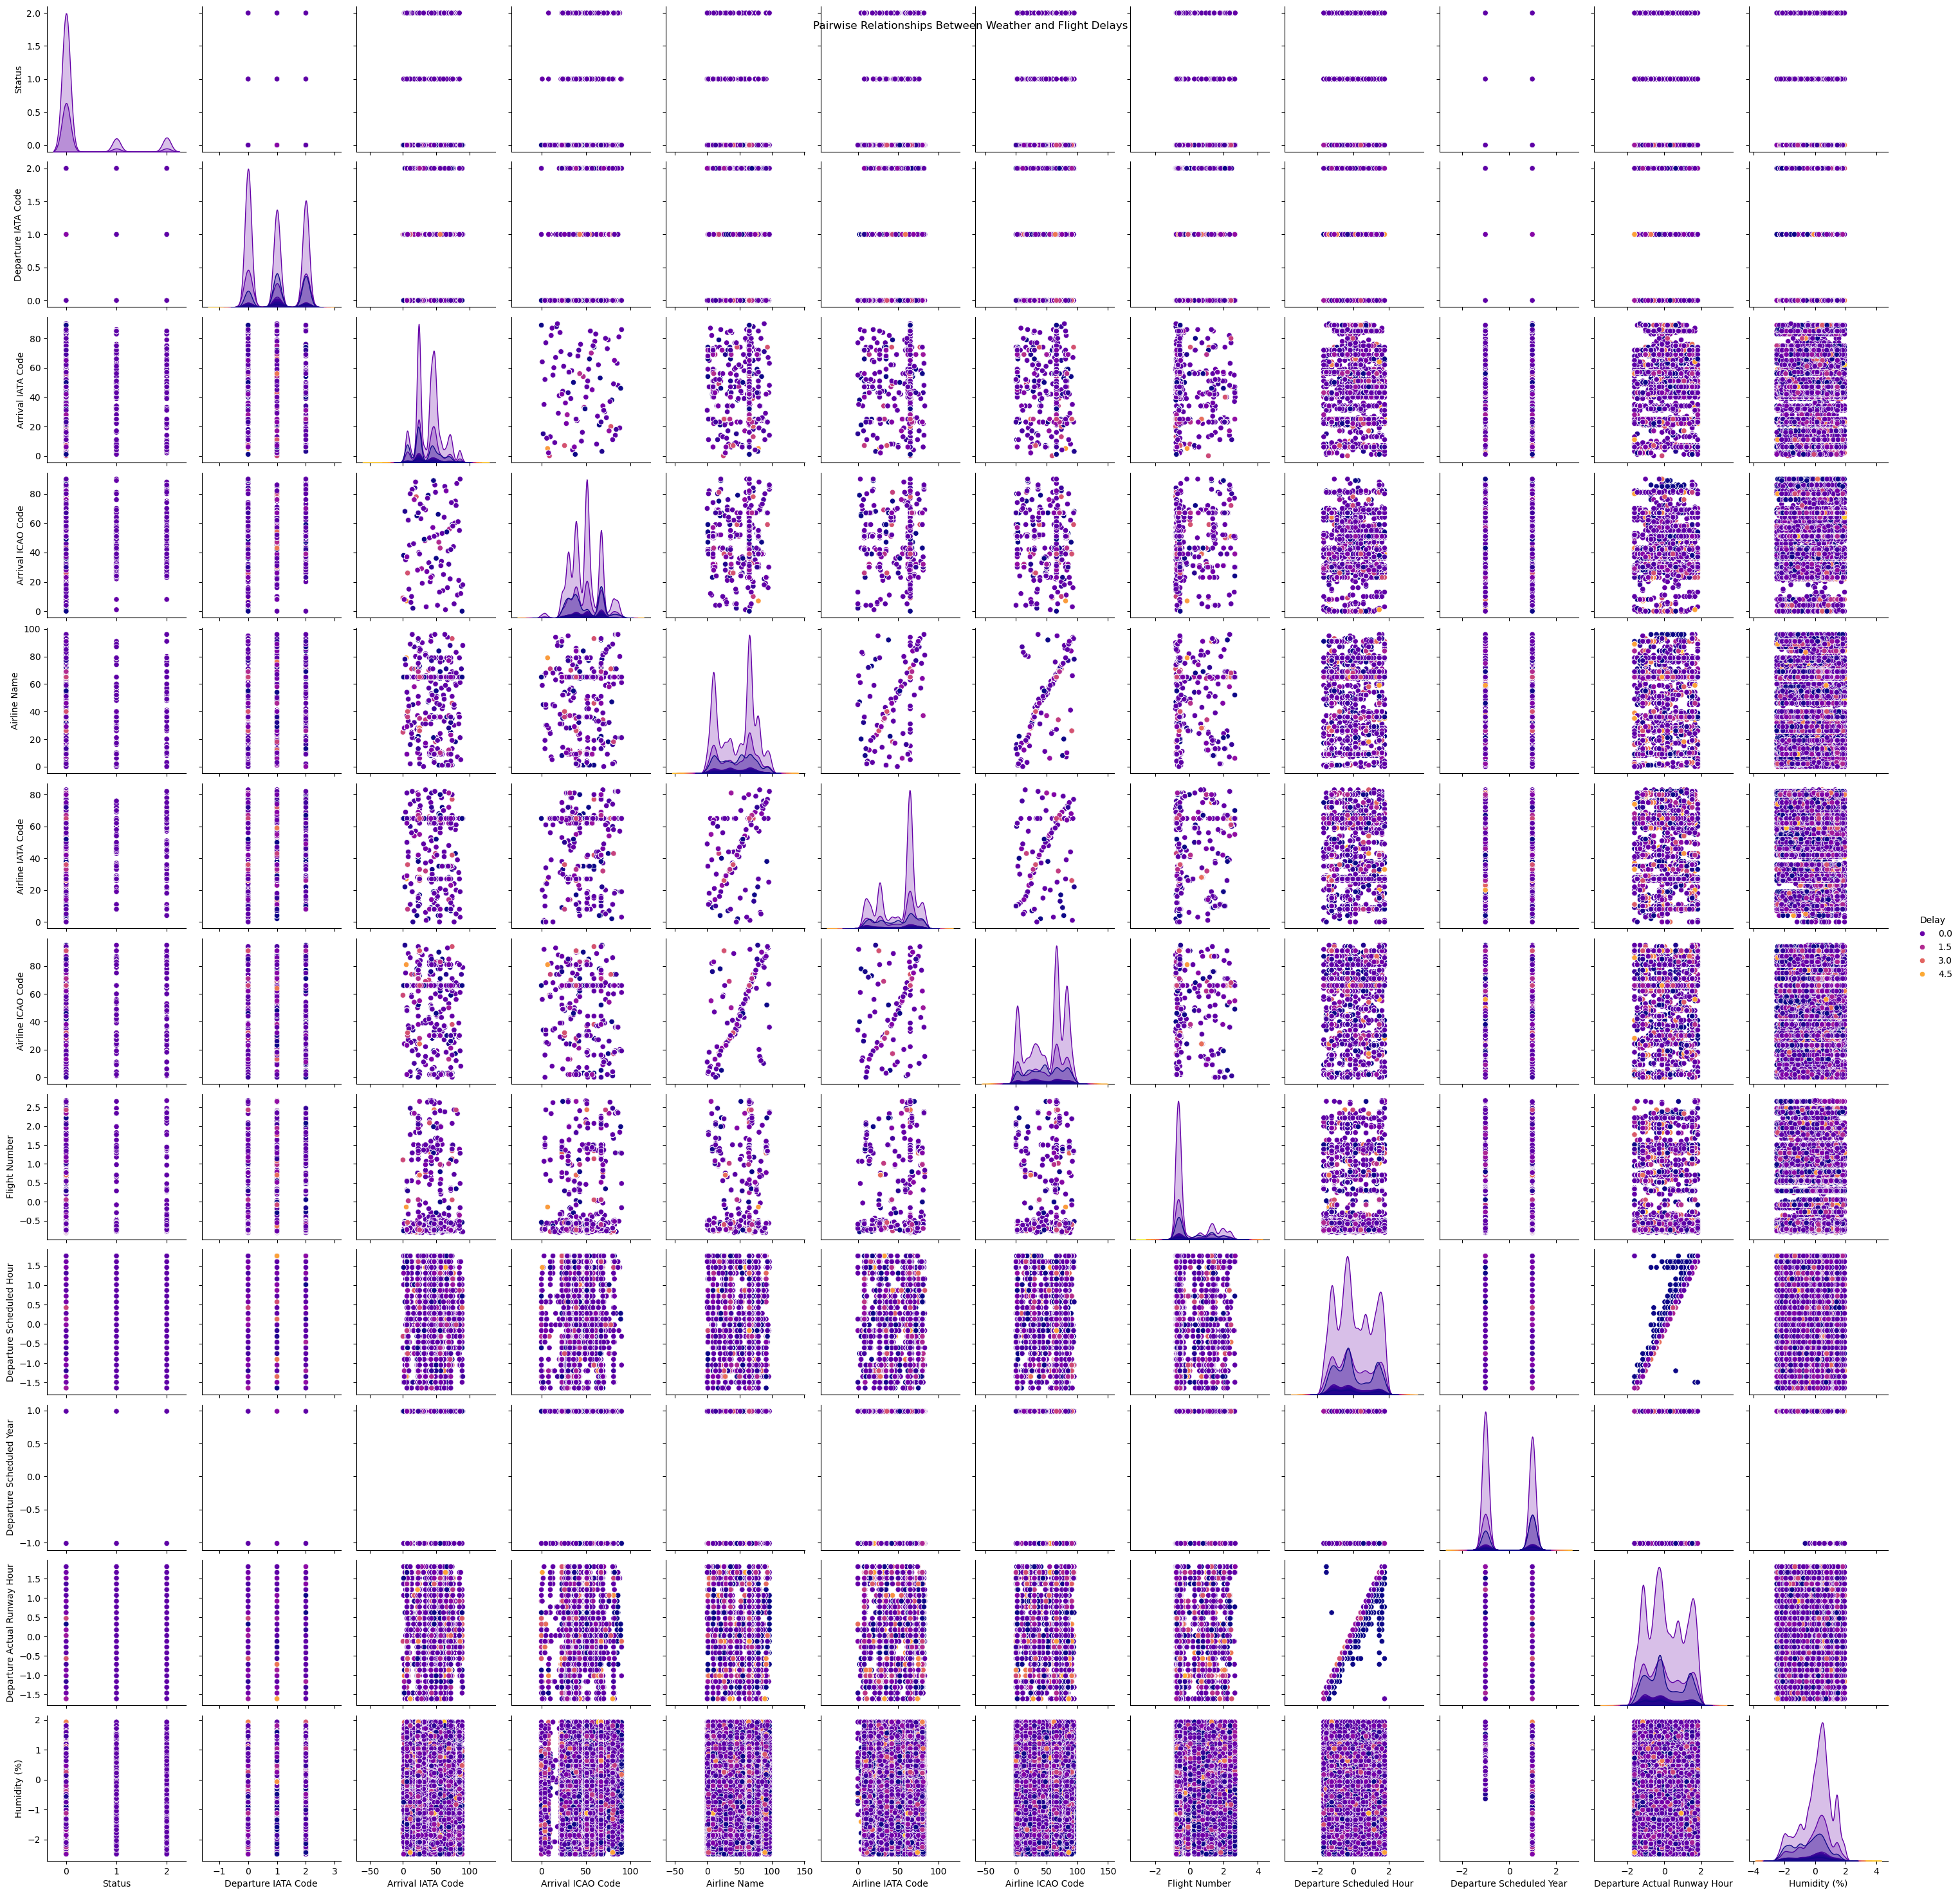

In [123]:
sns.pairplot(data2, hue='Delay', palette='plasma')
plt.suptitle('Pairwise Relationships Between Weather and Flight Delays')
plt.show()

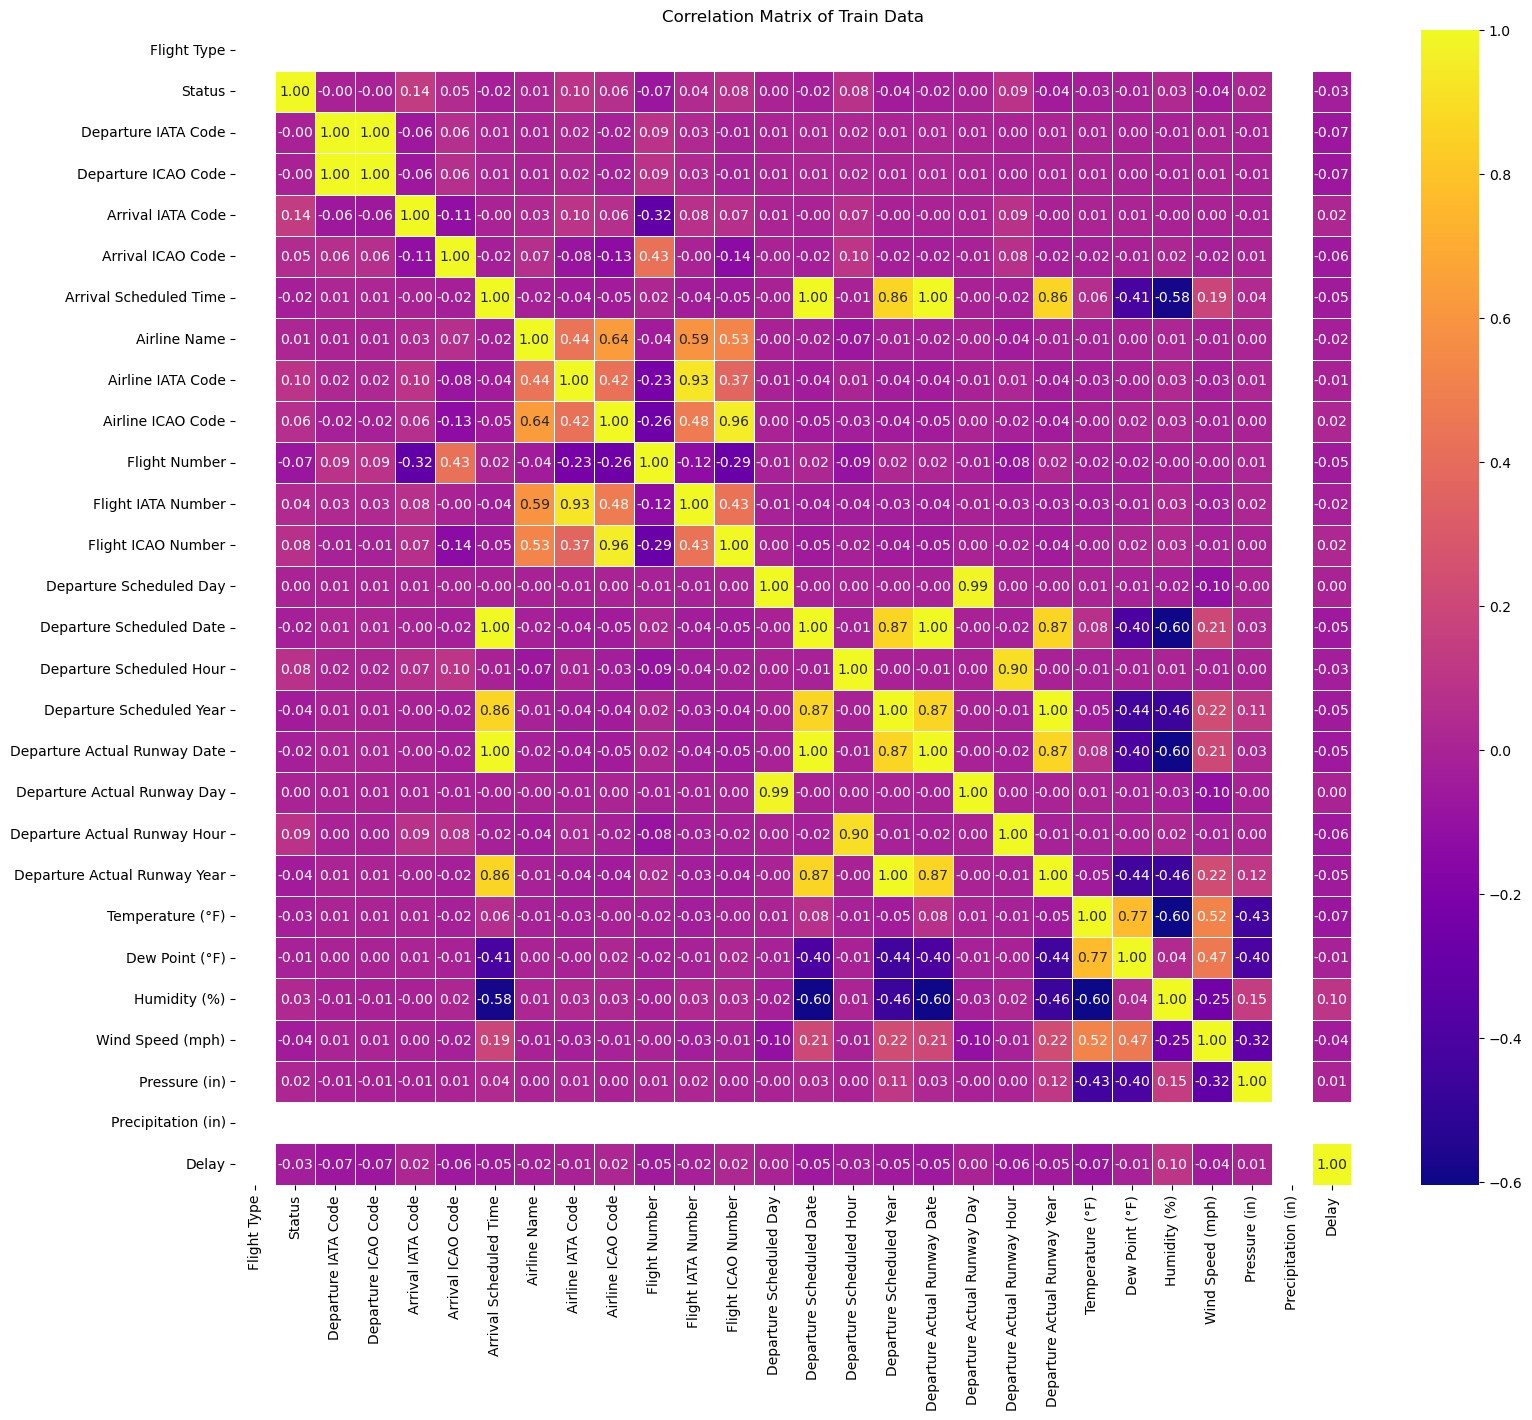

In [39]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='plasma', linewidths=0.5)
plt.title("Correlation Matrix of Train Data")
plt.show()

# selected_columns = ['Status',
#     'Departure IATA Code',
#     'Arrival IATA Code',
#     'Arrival ICAO Code',
#     'Airline Name',
#     'Airline IATA Code',
#     'Airline ICAO Code',
#     'Flight ICAO Number',
#     'Flight Number',
#     'Departure Scheduled Hour',
#     'Departure Scheduled Day',
#     'Departure Scheduled Year',
#     'Departure Actual Runway Hour',
#     'Departure Actual Runway Day',
#     'Humidity (%)',
#     'Delay'
# ]

#### Data Consistency

In [125]:
train = pd.read_csv('train_processed_data.csv')
test = pd.read_csv('test_processed_data.csv')

In [126]:
train_cols = train.columns
test_cols = test.columns
for i in train_cols:
    if i not in test_cols:
        print(i)

In [127]:
train_cols = train.columns
test_cols = test.columns
for i in test_cols:
    if i not in train_cols:
        print(i)